## Goal of this Notebook

Simulate random walks. We can add more paramaters later like cost of walk or slippage, which would be analagous to commissions and fees. 

The [kelly bet](https://en.wikipedia.org/wiki/Kelly_criterion) is calculated on a 1:1 payoff. We can also enhance the functionality of the kelly bet to account for differnt payoffs and losses with different probabilities. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def run_random_walks(starting_value, stride_length, p, n_steps, n_trials):
    """
    Run 1D random walks with the following parameters:
      starting_value -- Value on the number line at which to start the random walk
      stride_length  -- Size of our steps in either direction
      p              -- Probability of success
      n_trials       -- Number of trials to run
      n_steps        -- Number of steps to take on our random walk
      
    NOTE: 0 will be an absorbing state. Meaning that if we hit 0 we're stuck there
    
    Returns the trial_results, which contains the results of each random walk
    """
    trial_results = []
    
    for i in range(n_trials):
        values = []
        value = starting_value
        for i in range(n_steps):
            values.append(value)
            if (value <= 0):
                value = 0
            elif (random.random() < p):
                value += stride_length
            else:
                value -= stride_length
        trial_results.append(values)
    
    return trial_results

In [3]:
def run_random_walks_kelly(starting_value, p, n_steps, n_trials):
    """
    Run 1D random walks with the following parameters:
      starting_value -- Value on the number line at which to start the random walk
      stride_length  -- Size of our steps in either direction
      p              -- Probability of success
      n_trials       -- Number of trials to run
      n_steps        -- Number of steps to take on our random walk
      
    NOTE: 0 will be an absorbing state. Meaning that if we hit 0 we're stuck there
    
    Returns the trial_results, which contains the results of each random walk
    """
    trial_results = []
    
    for i in range(n_trials):
        values = []
        value = starting_value
        for i in range(n_steps):
            values.append(value)
            stride_length = int((2 * p - 1) * value) ## Kelly
            if (value <= 0):
                value = 0
            elif (random.random() < p):
                value += stride_length
            else:
                value -= stride_length
        trial_results.append(values)
    
    return trial_results

### Starting Value is 1000, Stride length is 10, p=1/2

In [4]:
starting_value = 1000
stride_length = 10 ## If success, add stride_length. If failure, subtract stride_length
p = 1/2            ## Chance of success
n_trials = 100     ## Number of random walks starting at the base value
n_steps = 1000     ## Number of steps to take on our random walk

trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)


Plot results of the random walk

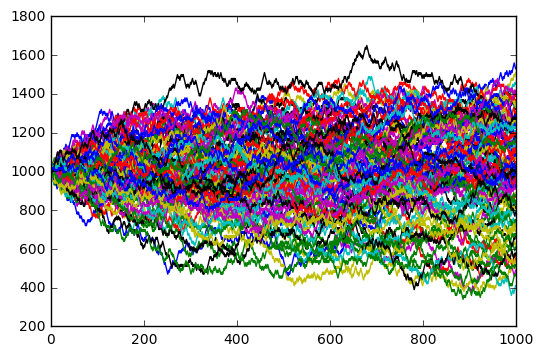

In [5]:
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

### Let's see what happens if we gain a 3% edge

In [6]:
p = 0.53
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)

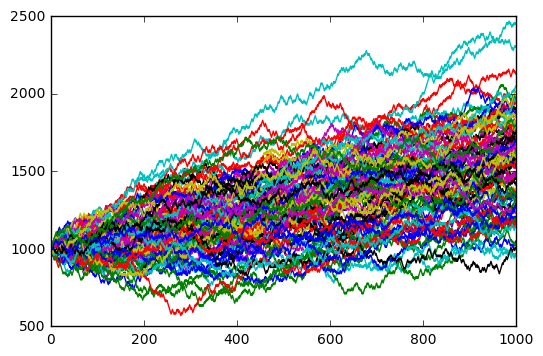

In [7]:
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

### Let's bet bigger!

In [8]:
stride_length = 50
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)

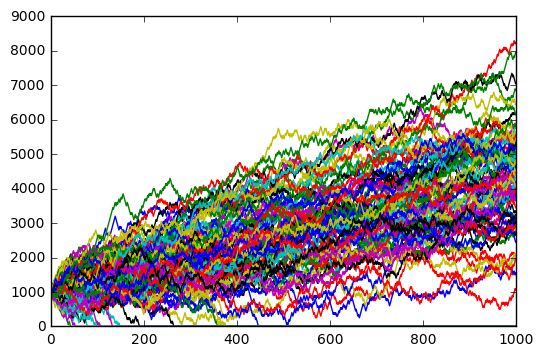

In [9]:
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

### 5% edge

In [10]:
p = 0.55
stride_length = 10
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)

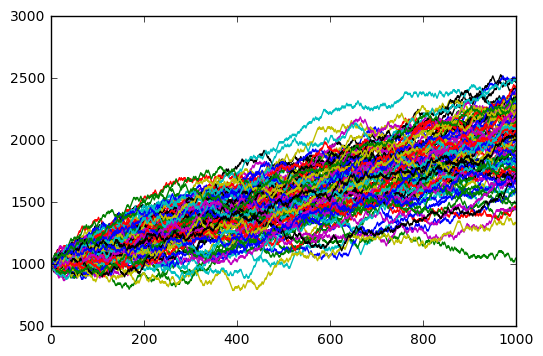

In [11]:
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

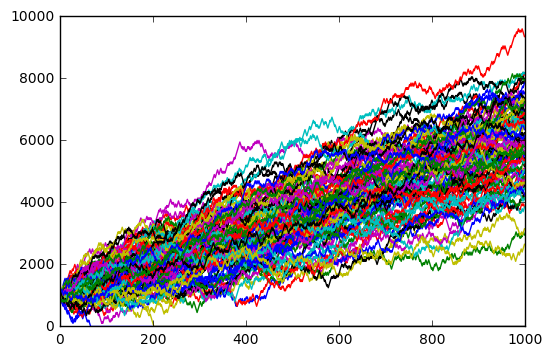

In [12]:
stride_length = 50
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

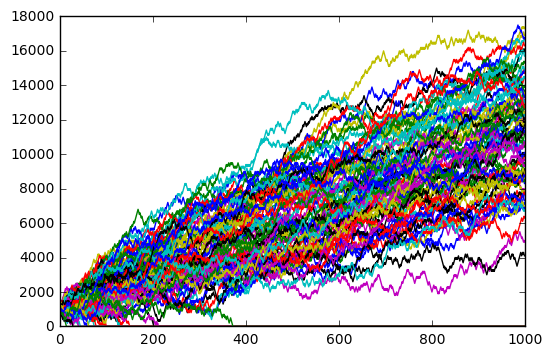

In [13]:
stride_length = 100
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

## Now let's try a dynamic random walk where the stride_length is determined by the Kelly Criterion

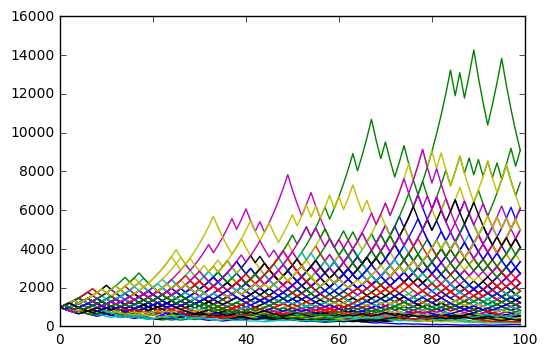

Mean of final values is 2239.81
Median of final values is 1498.5


In [20]:
p = 0.55
n_steps = 100
trial_results = run_random_walks_kelly(starting_value, p, n_steps, n_trials)
final_values = []
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
    final_values.append(trial_results[i][n_steps-1])
plt.show()
print("Mean of final values is " + str(np.mean(final_values)))
print("Median of final values is " + str(np.median(final_values)))

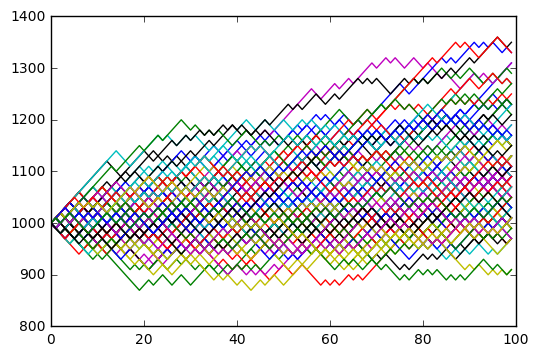

Mean of final values is 1102.8
Median of final values is 1090.0


In [21]:
p = 0.55
n_steps = 100
stride_length = 10
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)
final_values = []
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
    final_values.append(trial_results[i][n_steps-1])
plt.show()
print("Mean of final values is " + str(np.mean(final_values)))
print("Median of final values is " + str(np.median(final_values)))

## Gaussian Random Walk

In [16]:
#n, p = 10, .5  # number of trials, probability of each trial
#s = np.random.binomial(n, p, 1000)
# result of flipping a coin 10 times, tested 1000 times.